# Pyber Ride Sharing

## Analysis
#### Observed Trend 1: Rural areas tend to have higher rates with less rides compared to Urban areas that have cheaper fares, but more Pyber traffic.

#### Observed Trend 2:  Despite having cheapest fares, Urban areas still yield over 75% of the total Pyber cash.

#### Observed Trend 3: Urban and Suburban fares are more consistent city to city while Rural areas are stratified.

In [1]:
# import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
# read csv files

ride_data = "ride_data.csv"
ride_data = pd.read_csv(ride_data)

city_data = "city_data.csv"
city_data = pd.read_csv(city_data)
city_data.city.drop_duplicates(inplace=True)

# merge csv files
city_and_ride_data = pd.merge(ride_data, city_data, how='outer',on="city")

city_and_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


# Bubble Plot of Ride Sharing Data

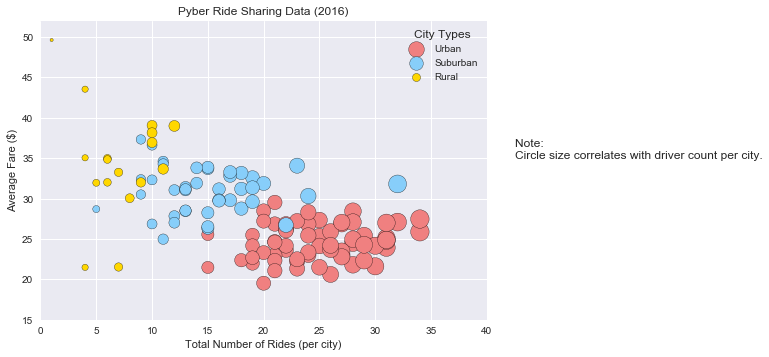

In [3]:
Urban = city_and_ride_data[(city_and_ride_data.type == "Urban")]
Suburban = city_and_ride_data[(city_and_ride_data.type == "Suburban")]
Rural = city_and_ride_data[(city_and_ride_data.type == "Rural")]

Urban_rides_per_city = Urban.groupby([city_and_ride_data.city]).count()["ride_id"]
Urban_average_fare = Urban.groupby([city_and_ride_data.city]).mean()["fare"]

Suburban_rides_per_city = Suburban.groupby([city_and_ride_data.city]).count()["ride_id"]
Suburban_average_fare = Suburban.groupby([city_and_ride_data.city]).mean()["fare"]

Rural_rides_per_city = Rural.groupby([city_and_ride_data.city]).count()["ride_id"]
Rural_average_fare = Rural.groupby([city_and_ride_data.city]).mean()["fare"]

plt.scatter(Urban_rides_per_city, Urban_average_fare, label = "Urban", s=Urban_rides_per_city*10, marker="o", c=["lightcoral"], edgecolors="black")
plt.scatter(Suburban_rides_per_city, Suburban_average_fare, label = "Suburban",s=Suburban_rides_per_city*10, marker="o", c=["lightskyblue"], edgecolors="black")
plt.scatter(Rural_rides_per_city, Rural_average_fare, label = "Rural", s=Rural_rides_per_city*10, marker="o", c=["gold"], edgecolors="black")

# Plot field size
plt.xlim(0, 40)
plt.ylim(15,52)

# Create a title, x label, and y label for plot
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")

plt.legend(title="City Types")

plt.annotate("Note: \nCircle size correlates with driver count per city.", xy=(30, 30), xycoords='data',xytext=(42.5, 35),)
            
            
plt.grid(c="white")

plt.show()

# Total Fares by City Type

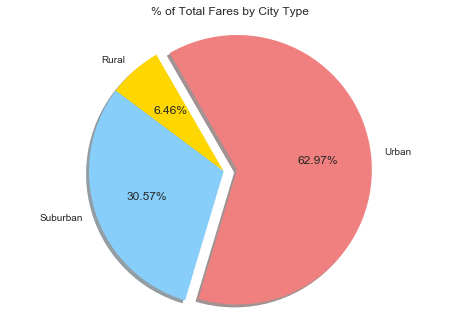

In [4]:
#Define Axis

#X axis
Total_rides_per_city_Fare = city_and_ride_data.groupby(["type"])[["fare"]].sum()

# Format plot
plt.pie(Total_rides_per_city_Fare, 
        explode=[0,0,.1], 
        labels=["Rural","Suburban","Urban"], 
        colors=["gold","lightskyblue", "lightcoral"], 
        autopct= '%.2f%%',
        pctdistance=.6, 
        shadow=True, 
        startangle=120)

# Create a title, x label, and y label for plot
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

# Total Rides by City Type

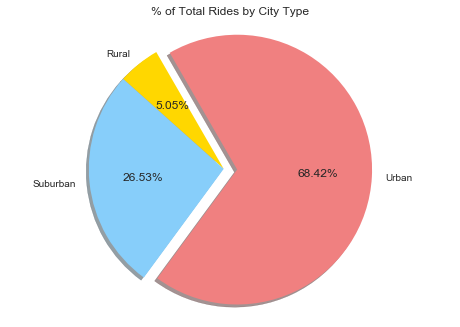

In [5]:
#Define Axis

#X axis
Total_Rides_by_City_Type = city_and_ride_data.groupby(["type"])[["ride_id"]].count()

# Format plot
plt.pie(Total_Rides_by_City_Type, 
        explode=[0,0,.1], 
        labels=["Rural","Suburban","Urban"], 
        colors=["gold","lightskyblue", "lightcoral"], 
        autopct= '%.2f%%',
        pctdistance=.6, 
        shadow=True, 
        startangle=120)

# Create a title, x label, and y label for plot
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()

# Total Drivers by City Type

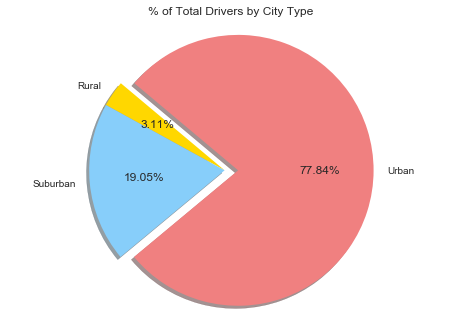

In [6]:
#Define Axis
#city_data.type
#X axis
Total_Drivers_by_City_Type = city_data.groupby(["type"])[["driver_count"]].sum()

# Format plot
plt.pie(Total_Drivers_by_City_Type, 
        explode=[0,0,.1], 
        labels=["Rural","Suburban","Urban"], 
        colors=["gold","lightskyblue", "lightcoral"], 
        autopct= '%.2f%%',
        pctdistance=.6, 
        shadow=True, 
        startangle=140)

# Create a title, x label, and y label for plot
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()